# Notebook 1 : Statistics

#### 1. Calculate the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%.

The math.comb function can be used for this purpose. Math.comb returns the total number of ways of picking k items from n items without repetition or order. We can then get the probabilty of selecting the correct cups by dividing the total selection options by 1. Multiplying the result by 100 will give the percentage probability.

In [1]:
# Import Math and other required modules for this notebook
import math
import itertools
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

First, we will calculate the probability of selecting 4 cups correctly from 8, per the original experiment. 

In [2]:
(1/math.comb(8,4)) * 100

1.4285714285714286

The probability of selecting all 4 cups correctly is 1.4%. To decrease the probability of randomly selecting the correct cups, we must increase the sample size. The more possibilities we have for selection, the less chance we have of randomly selecting the correct set. Below, the sample size is increased to 10, and the probability of getting 5 correct is calculated.

In [3]:
(1/math.comb(10,5)) * 100

0.3968253968253968

The probability of getting all five correct cups by selecting randomly is 0.4%. Therefore, 10 cups is the minimum sample size required to ensure a probability of less than 1%.

#### 2. Bonus: How many would be required if you were to let the taster get one cup wrong while maintaining the 1% threshold?



Allowing the taster to get one cup wrong will increase the number of potential combinations to choose from. Therefore, we must increase the sample size to counter this, as this will increase the number of available choices, and reduce the probability of randomly selecting the correct cups.

The below function is based on the code used to plot the possibilities of total correct answers for the original sample size of 8. It takes a single parameter, n, which corresponds to the total number of cups. It generates a list of integers of length n, and the number of choices corresponds to n/2. All possible combinations are generated and stored in the array poss. A sample is randomly chosen to correspond to the cups with the milk added. The function then iterates through all potential combinations, and counts the total cups with the milk in them first. Every time all cups except one are correct, the count is increased. The total count of times where just one cup is incorrect are divided by the total potential options to get the probability of random selection

In [4]:
def find_probability (n) :
    cups = np.arange(0, n)
    choices = int(n/2)
    poss = list(itertools.combinations(cups, choices))
    total_options = len(poss)
    milkfirst = set(random.choice(poss))

    count = 0

    for i in itertools.combinations(cups,choices):
        no_correct = len(milkfirst & set(i))
        if no_correct == choices - 1 :
            count +=1
        
    probability = count/total_options
    return probability*100
    

Below is the probability of getting 3 cups correct and 1 incorrect, when the sample size is 8. This is calculated as a sanity check, if the function is correct we would expect it to return a probability of approximately 20%.

In [5]:
find_probability(8)

22.857142857142858

The first even number to return a value of <1 is 16, hence we can say that 16 cups are required to allow the tester to get 1 wrong while maintaining a probability of random selection of ~1%.

In [6]:
find_probability(16)

0.4972804972804973

#### 3. Use scipy's version of Fisher's exact test to simulate the Lady Tasting Tea problem.

##### Contingency Table:
|             | Tea First (Actual) |Milk First (Actual |
| ----------- | -----------------  |-----------        |
| Tea First (Selected)      | 4       |0       |
| Milk First (Selected)   | 0        |4        |

## Scipy Stats Independent T-Test

### Overview of Independent T - Tests

An independent t-test compares the means of two unrelated groups on one continuous dependent variable. For example, an independent t-test might be used to determine if men are more active than women by comparing the mean active minutes per week for both groups.  It is a type of inferential statistic, meaning that the test is conducted on a representative sample of the two groups. The results are then used to draw conclusions on the groups from which the samples were drawn. The independent t-test allows us to establish whether any differences in means between the two groups occurred by random chance.

### Assumptions of Independent T - Tests

An independent t-test should only be used when our data meets the following assumptions:

1. **Independence**: The two test groups should be based on unrelated, non-numerical (categorical) variables. In the above example, men and women would represent the two independent variables for the test.
2. **Normality**: The dependent variable, i.e. the measure we're comparing the means for, should be approximately normally distributed and measured on a continuous scale. In the above example, active minutes per week would be considered the dependent variable.
3. **Homogeneity of Variances**: The variances of the dependent variable should be equal. 

### Hypotheses

Independent t-tests have the following hypotheses:
 - **Null Hypothesis**: The means for the two populations are equal.
 - **Alternative Hypothesis**: The means for the population are not equal.
 
The test returns two results, the t-statistic and p-value. Higher t-values (positive or negative) suggest a significant difference between the two groups, and p-values below 5% indicate a very low likelihood that the results occured by chance. Therefore, the p-value, in conjunction with the t-statistic, tell us whether the null hypothesis that both populations are equal can be rejected.

### SciPy Stats T Test Function

[Link to Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

The Scipy Stats ttest_ind function performs an independent samples t-test on two independent samples and returns the calculated t-statistic and p-values.

The structure of the function is as follows:
~~~~
scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)[source]
~~~~

### Input

##### Required
- *a, b* : Two NumPy arrays to represent the population samples, both should have the same shape (number of dimensions)

##### Optional
- *axis: int.*  Where multiple axees exist in a and b, choose axis along which to perform t-test. If none selected, results will be calculated over whole arrays.
- *equal_var: bool* : If set to true, equal variances are assumed for a and b, i.e. the average squared distance from the mean is the same in both samples. If set to false, equal variances are not assumed and Welch's t-test is performed instead of student's t-test.
- *nan_policy: {propogate, raise, omit}*: Specifies how non-numeric values should be dealt with. Propogate will return NaN as a result, raise will return an error and omit will perform calculations ignorning non-numeric values.
- *Permutations: int*: If set to 0, the p-value is obtained by comparing the t-statistic of the test data with a hypothetical t-distribution. If a value is given for permutations that is less than the total number of potential distinct combinations for the pooled data, the samples are aggregated and randomly assigned to group a or b and the t-statistic is calculated. This is repeated multiple times, according to the value set for Permutations, and a t-statistic under the null hypothesis is generated. Subsequently, the t-statistic of the observed data is then compared to this value and a p-value is determined. If the value for Permutations exceeds the binomial coefficient, the data will be separated into a and b in each distinct way exactly once and an exact test will be carried out.
- *trim: float*: Valid values range between 0 and 0.5. If this is set to a non-zero value, elements will be trimmed from both tails of the samples. The total trimmed elements is calculated as follows: floor(trim) * total elements in array. Trimming is recommended in cases with multiple outliers or where the distribution is long-tailed. 
### Output
- *statistic*: T-statistic representing difference between means: float or array depending on number of dimensions in a and b.
- *pvalue*: Probability that results occured by chance: float or array as above.

### Function Examples

The below examples are adapted from the scipy.stats documentation for the ttest_ind function.

#### Example 1: Two Samples with Identical Means

When the t-test is run on two samples with identical means, we would expect a low t-statistic as output as the difference between means will be negligible. 

In [7]:
rng = np.random.default_rng()

# Generate two samples from normal distribution with same mean values
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)

print ("Mean 1: {}".format(round(np.mean(rvs1),3)))
print ("Mean 2: {}".format(round(np.mean(rvs2),3)))

Mean 1: 4.917
Mean 2: 5.468


As seen above, the difference in means between the two samples is relatively low. Additionally, when the distribution of the samples is plotted, we can see a peak at approximately 5 in both cases.

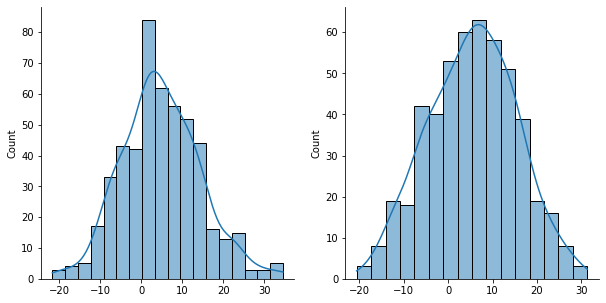

In [8]:
fig,(ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(10,5)
sns.histplot(rvs1, ax = ax1, kde = True)
sns.histplot(rvs2, ax = ax2, kde = True)
sns.despine()
plt.show()
plt.close()

In [9]:
# Performing t-test on both samples, first assuming equal variances then unequal

def equal_unequal(a,b):
    equal_var = stats.ttest_ind(a, b)
    print("\nEqual Variances Assumed \nT-statistic {}, p-value {}".format(equal_var[0],equal_var[1]))
    print("-" *80)
    unequal_var = stats.ttest_ind(a, b, equal_var = False)
    print("\nUnequal Variances Assumed \nT-statistic {}, p-value {}".format(unequal_var[0],unequal_var[1]))
    print("-" *80)

equal_unequal(rvs1,rvs2)    


Equal Variances Assumed 
T-statistic -0.8972663533430147, p-value 0.36979320049750564
--------------------------------------------------------------------------------

Unequal Variances Assumed 
T-statistic -0.8972663533430147, p-value 0.36979341257171605
--------------------------------------------------------------------------------


As the above results show, the difference between the two means is insignificant, as indicated by the low t-statistic value. Additionally, the p-value is above 0.5; these two values combined suggest that we must accept the null hypothesis that both samples are the same. We can see that the p-value is slightly higher when unequal variances are assumed, suggesting that when Welch's t-test is performed the p-value is underestimated. However, the t-statistic values obtained from both tests are identical. This indicates when the mean values of the sample populations are the same, the value obtained for the t-statistic will be the same regardless of whether equal variances are assumed.

#### Example 2: Two Samples with Identical Means and Varying Scales

The below code generates a random array with the same mean value as rvs1 and rvs2, but with a higher value for Scale. This will result in an increased spread in the distribution of values in the array.

In [10]:
# Generate third array with higher scale and plotting to see difference
rvs3 = stats.norm.rvs(loc=5, scale=20, size=500, random_state=rng)
print ("Mean 1: {}".format(round(np.mean(rvs1),3)))
print ("Mean 2: {}".format(round(np.mean(rvs2),3)))
print ("Mean 3: {}".format(round(np.mean(rvs3),3)))

Mean 1: 4.917
Mean 2: 5.468
Mean 3: 5.874


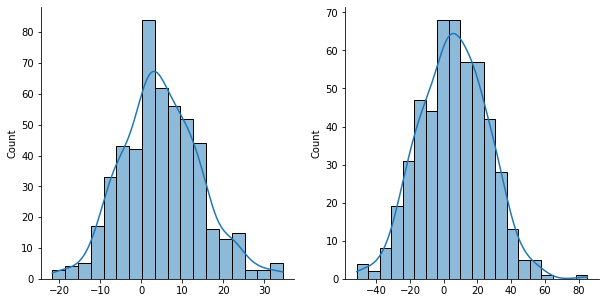

In [11]:
#Plotting against rvs2 for comparison
fig,(ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(10,5)
sns.histplot(rvs1, ax = ax1, kde = True)
sns.histplot(rvs3, ax = ax2, kde = True)
sns.despine()
plt.show()

We can see that although the peak of both distributions remains the same, values are spread over a wider range for the rvs3 array, resulting in a less steep curve.

Below, the t-test is conducted using rvs1 and rvs3 as input, with both equal and unequal variances assumed.

In [12]:
equal_unequal(rvs1,rvs3)    


Equal Variances Assumed 
T-statistic -0.9614920538951941, p-value 0.33653771080915684
--------------------------------------------------------------------------------

Unequal Variances Assumed 
T-statistic -0.9614920538951941, p-value 0.3366304930606089
--------------------------------------------------------------------------------


Again, the t-statistic value is identical when equal and unequal variances are assumed. The t-statistic is approximately -1, suggesting that the difference in means between the groups is still negligible, despite the increased spread in rvs3. As above, the p-value is slightly higher when equal variances are not assumed. When variances between two samples are not equal, it is more likely that any differences in means occured by random chance.

#### Example 3: Two Samples with Identical Means and Different Sample Sizes

The below code generates an additional array with the same mean value but a smaller sample size than the previous arrays (n=100).

In [13]:
rvs4 = stats.norm.rvs(loc=5, scale=20, size=100, random_state=rng)

As sample size increases, the variation between individual elements increases but the variance of the mean (standard error) decreases. Hence, we would expect that variances between the rsv4 and any of the previous arrays would not be equal; we can verify this using Levene's test, which tests the null hypothesis that variances between input samples are equal. If the returned p-value is less than 0.05, we can reject this and conclude unequal variances.

In [14]:
def equal_variances  (a,b):
    stat, p = stats.levene(rvs1,rvs4)
    if p <0.05:
        print("Unequal Variances")
    else:
        print("Equal Variances")

equal_variances(rvs1,rvs4)

Unequal Variances


Levene's test indicates unequal variances between rvs1 and rvs4. Therefore, if we assume equal variances when running the t-test on the two samples, this is likely to affect the accuracy of the results.

In [15]:
equal_unequal(rvs1,rvs4)


Equal Variances Assumed 
T-statistic -1.0357659891238185, p-value 0.30072998341527746
--------------------------------------------------------------------------------

Unequal Variances Assumed 
T-statistic -0.6549222181768456, p-value 0.5139129661810338
--------------------------------------------------------------------------------


As seen above, the  t-statistc and p-values are overestimated when equal variances are assumed. We know in this case that the mean value of both samples is 5, hence the values returned by Welch's t-test are much more accurate than those from the standard t-test.

#### Example 3: Two Samples with Identical Means and Different Sample Sizes

In this case, we would expect the t-test would allow us to reject the null hypothesis that both samples have the same mean. As the sample sizes are different, we should not assume equal variances. This can again be verified using Levene's test.

In [16]:
rvs5 = stats.norm.rvs(loc=8, scale=20, size=100, random_state=rng)
equal_variances(rvs1,rvs5)

Unequal Variances


The below code runs the t-test on the two different-sized arrays. The test is repeated for equal arrays of varying sample sizes, to see the impact of increased sample size on accuracy of results

In [17]:
equal_unequal(rvs1,rvs5)


Equal Variances Assumed 
T-statistic -2.497184237141371, p-value 0.012786158754138268
--------------------------------------------------------------------------------

Unequal Variances Assumed 
T-statistic -1.569127057548557, p-value 0.11955552256073551
--------------------------------------------------------------------------------


In [18]:
equal_unequal(rvs4,rvs5)


Equal Variances Assumed 
T-statistic -0.6702705288918064, p-value 0.5034663520788358
--------------------------------------------------------------------------------

Unequal Variances Assumed 
T-statistic -0.6702705288918064, p-value 0.5034664853351736
--------------------------------------------------------------------------------


In [19]:
rvs6 = stats.norm.rvs(loc=8, scale=20, size=500, random_state=rng)
equal_unequal(rvs1,rvs6)


Equal Variances Assumed 
T-statistic -2.4533361845907633, p-value 0.01432391326199812
--------------------------------------------------------------------------------

Unequal Variances Assumed 
T-statistic -2.4533361845907633, p-value 0.014384552209977206
--------------------------------------------------------------------------------
